In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple
from scipy.stats import mode
from itertools import groupby

In [104]:
# Normalizamos una distribución a un tamaño
def normalize_distribution(dist: np.array, n: int) -> np.array:
    # ajustamos a la suma n 
    b = dist - min(dist) + 0.000001
    c = (b / np.sum(b)) * n
    return np.round(c)

In [105]:
# Creamos una distribución normalizada con medida * tamaño
def create_distribution(mean: float, size: int) -> pd.Series:
    return normalize_distribution(np.random.standard_normal(size), mean * size)

In [106]:
# Generamos las listas de distribuciones para las medidas especificadas
def generate_df(means: List[Tuple[float, float, str]], n: int) -> pd.DataFrame:
    lists = [
        (create_distribution(_x, n), create_distribution(_y, n), np.repeat(_l, n))
        for _x, _y, _l in means
    ]
    x = np.array([])
    y = np.array([])
    labels = np.array([])
    for _x, _y, _l in lists:
        x = np.concatenate((x, _x), axis=None)
        y = np.concatenate((y, _y))
        labels = np.concatenate((labels, _l))
    return pd.DataFrame({"titulo": x, "duracion": y, "estreno": labels})

In [107]:
def scatter_group_by(df: pd.DataFrame, x_column: str, y_column: str, label_column: str):
    fig, ax = plt.subplots()
    labels = pd.unique(df[label_column])
    
    custom_colors = ['red', 'green', 'blue']

    for i, label in enumerate(labels):
        filter_df = df.query(f"{label_column} == '{label}'")
        ax.scatter(filter_df[x_column], filter_df[y_column], label=label, color=custom_colors[i])
    
    ax.legend()
    plt.show()

In [108]:
# Distancia entre dos puntos
def euclidean_distance(p_1: np.array, p_2: np.array) -> float:
    return np.sqrt(np.sum((p_2 - p_1) ** 2))

In [109]:
def k_nearest_neighbors(
    points: List[np.array], labels: np.array, input_data: List[np.array], k: int
):
    # Distancias euclidianas entre los datos de entrada y los puntos existentes
    input_distances = [
        [euclidean_distance(input_point, point) for point in points]
        for input_point in input_data
    ]
    points_k_nearest = [
        np.argsort(input_point_dist)[:k] for input_point_dist in input_distances
    ]
    
    def calculate_mode(point_nearest):
        if isinstance(point_nearest[0], (int, float)):
            # Moda para valores numéricos
            return mode(point_nearest).mode[0]
        else:
           # Moda para valores no numéricos
            grouped = groupby(sorted(point_nearest))
            max_group = max((list(group) for key, group in grouped), key=len)
            return max_group[0]

    return [calculate_mode([labels[index] for index in point_nearest]) for point_nearest in points_k_nearest]

# Creamos un conjunto de datos 
groups = [(20, 20, "grupo1"), (80, 40, "grupo2"), (200, 200, "grupo3")]
df_películas = generate_df(groups, 50)

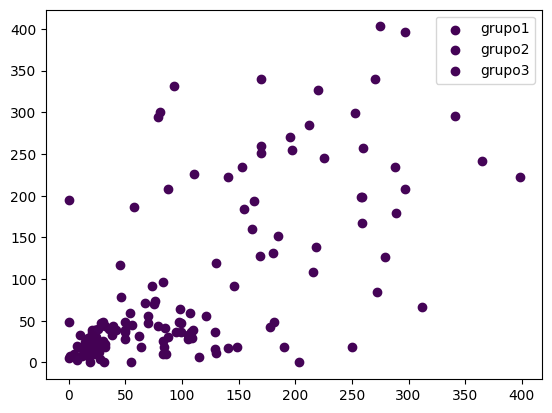

['grupo2', 'grupo1', 'grupo3', 'grupo2']


In [110]:
# Guardar la imagen con el gráfico
scatter_group_by(df_películas, "titulo", "duracion", "estreno")

list_t = [
    (np.array(tuples[0:1]), tuples[2])
    for tuples in df_películas.itertuples(index=False, name=None)
]
points = [point for point, _ in list_t]
labels = [label for _, label in list_t]

# Ejemplo de clasificación de k-nearest neighbors para algunos puntos
kn = k_nearest_neighbors(
    points,
    labels,
    [np.array([100, 150]), np.array([1, 1]), np.array([1, 300]), np.array([80, 40])],
    5,
)
print(kn)

#Group1: peliculas con titulo y duracion más corto
#Group2: peliculas con titulo mas descriptivo y duracion moderada
#Group3: peliculas con titulo y duracion más largos
#X:titulo de la pelicula Y:duracion de la pelicula